In [1]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt
import math
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot as plt
from matplotlib import pyplot



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until
Using TensorFlow backend.


#Data preperation
#Take essential details, Day, LCLid and energy_sum and store in new csv
for num in range(0,112):
    df = pd.read_csv(r"daily_dataset\daily_dataset\block_"+str(num)+".csv")
    df = df[['day','LCLid','energy_sum']] 
    df.reset_index()
    df.to_csv("hc_"+str(num)+".csv")
    


#Prepare energy.csv for appending
fout= open("energy.csv","a")
# first file:
for line in open("hc_0.csv"):
    fout.write(line)
# now the rest:    
for num in range(0,112):
    f = open("hc_"+str(num)+".csv")
    f.readline() # skip the header
    for line in f:
         fout.write(line)
    f.close()
fout.close()

In [2]:
energy = pd.read_csv("energy.csv")
len(energy)


3536007

In [3]:
housecount = energy.groupby('day')[['LCLid']].nunique()


            LCLid
day              
2011-11-23     13
2011-11-24     25
2011-11-25     32
2011-11-26     41
2011-11-27     41
<class 'pandas.core.frame.DataFrame'>


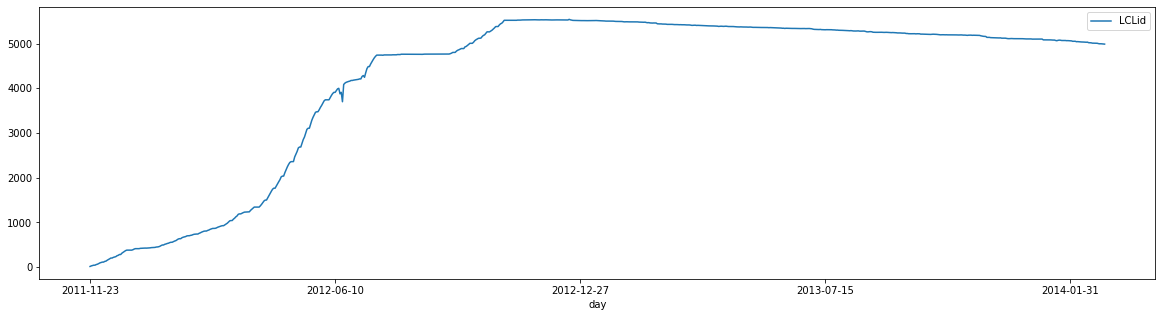

In [4]:
print(housecount.head(5))
housecount.plot(figsize=(20,5))
print(type(housecount))


In [5]:
energy = energy.groupby('day')[['energy_sum']].sum()
energy = energy.merge(housecount, on = ['day'])
energy = energy.reset_index()



In [6]:
energy.head(5)


,day,energy_sum,LCLid
0,2011-11-23,90.385000,13
1,2011-11-24,213.412000,25
2,2011-11-25,303.993000,32
3,2011-11-26,420.976000,41
4,2011-11-27,444.883001,41


In [7]:
energy.day = pd.to_datetime(energy.day,format='%Y-%m-%d').dt.date


In [8]:
energy.head(5)

,day,energy_sum,LCLid
0,2011-11-23,90.385000,13
1,2011-11-24,213.412000,25
2,2011-11-25,303.993000,32
3,2011-11-26,420.976000,41
4,2011-11-27,444.883001,41


In [9]:
energy['avg_energy'] =  energy['energy_sum']/energy['LCLid']
energy.tail(5)

,day,energy_sum,LCLid,avg_energy
824,2014-02-24,52867.660004,4994,10.586235
825,2014-02-25,52330.109999,4995,10.476498
826,2014-02-26,51804.199995,4993,10.375366
827,2014-02-27,52580.878999,4990,10.537250
828,2014-02-28,1056.076000,4987,0.211766


In [10]:
energy.describe()


,energy_sum,LCLid,avg_energy
count,829.000000,829.000000,829.000000
mean,43535.325676,4234.539204,10.491862
std,20550.594031,1789.994799,1.902513
min,90.385000,13.000000,0.211766
25%,34665.436003,4084.000000,8.676955
50%,46641.160997,5138.000000,10.516983
75%,59755.616996,5369.000000,12.000690
max,84156.135002,5541.000000,15.964434


In [11]:
#Weather data set
weather = pd.read_csv('weather_daily_darksky.csv')


In [12]:
weather.describe()
#Minimum temperature of -0.06. Unlikely scenario in Myanmar


,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
count,882.000000,882.000000,882.000000,881.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,881.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,13.660113,195.702948,6.530034,0.477605,3.581803,1014.127540,12.723866,11.167143,0.781871,6.085045,12.929467,2.542565,7.709841,7.414161,13.542392,5.738039,0.500930
std,6.182744,89.340783,4.830875,0.193514,1.694007,11.073038,7.279168,2.466109,0.095348,6.031967,7.105426,1.832985,4.871004,4.888852,6.260196,6.048746,0.287022
min,-0.060000,0.000000,-7.840000,0.000000,0.200000,979.250000,-6.460000,1.480000,0.430000,-8.880000,-4.110000,0.000000,-5.640000,-5.640000,-0.810000,-8.880000,0.000000
25%,9.502500,120.500000,3.180000,0.350000,2.370000,1007.435000,7.032500,10.327500,0.720000,1.522500,7.332500,1.000000,3.990000,3.705000,9.212500,1.105000,0.260000
50%,12.625000,219.000000,6.380000,0.470000,3.440000,1014.615000,12.470000,11.970000,0.790000,5.315000,12.625000,2.000000,7.540000,7.100000,12.470000,4.885000,0.500000
75%,17.920000,255.000000,10.057500,0.600000,4.577500,1021.755000,17.910000,12.830000,0.860000,11.467500,17.920000,4.000000,11.467500,11.277500,17.910000,11.277500,0.750000
max,32.400000,359.000000,17.770000,1.000000,9.960000,1040.920000,32.420000,15.340000,0.980000,20.540000,32.420000,7.000000,20.540000,20.540000,32.400000,20.540000,0.990000


from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")


# Compute the correlation matrix
corr = weather_energy_gbp.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))


# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [13]:
weather['day']=  pd.to_datetime(weather['time']) # day is given as timestamp
weather.loc[0:5,'day']

0   2011-11-11
1   2011-12-11
2   2011-12-27
3   2011-12-02
4   2011-12-24
5   2011-12-15
Name: day, dtype: datetime64[ns]

In [14]:
weather['day']=  pd.to_datetime(weather['day'],format='%Y%m%d').dt.date
weather.loc[0:5,'day']


0    2011-11-11
1    2011-12-11
2    2011-12-27
3    2011-12-02
4    2011-12-24
5    2011-12-15
Name: day, dtype: object

In [15]:
# selecting numeric variables
weather = weather[['temperatureMax', 'windBearing', 'dewPoint', 'cloudCover', 'windSpeed',
       'pressure', 'apparentTemperatureHigh', 'visibility', 'humidity',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex',
       'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase','day']]
weather = weather.dropna()

In [16]:
weather.head(5)

,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,day
0,11.96,123,9.40,0.79,3.88,1016.08,10.87,3.30,0.95,10.87,11.96,1.0,10.87,8.85,10.87,6.48,0.52,2011-11-11
1,8.59,198,4.49,0.56,3.94,1007.71,5.62,12.09,0.88,-0.64,5.72,1.0,3.09,2.48,8.59,0.11,0.53,2011-12-11
2,10.33,225,5.47,0.85,3.54,1032.76,10.33,13.39,0.74,5.52,10.33,0.0,8.03,8.03,10.33,5.59,0.10,2011-12-27
3,8.07,232,3.69,0.32,3.00,1012.12,5.33,11.89,0.87,3.26,5.33,1.0,6.33,2.56,7.36,0.46,0.25,2011-12-02
4,8.22,252,2.79,0.37,4.46,1028.17,5.02,13.16,0.80,4.37,5.32,1.0,7.45,3.17,7.93,-0.51,0.99,2011-12-24


In [17]:
#Merge weather and energy dataset
weather_energy =  energy.merge(weather,on='day')
print(weather_energy['day'].head(2))
print(weather_energy['day'].tail(2))



0    2011-11-23
1    2011-11-24
Name: day, dtype: object
826    2014-02-27
827    2014-02-28
Name: day, dtype: object


In [18]:
#Get data on exchange rate. Exchange rate is used as an indicator of economic performance, on a daily basis.
exchange = pd.read_csv('exchange.csv')
exchange.tail(5)

,Date,Close
295,24/02/2014,1.663340
296,25/02/2014,1.665695
297,26/02/2014,1.667723
298,27/02/2014,1.666833
299,28/02/2014,1.669198


exchange= exchange.format({"Date": lambda t: t.strftime("%d-%m-%Y")})


In [19]:
exchange['Date']=  pd.to_datetime(exchange['Date'],format='%d/%m/%Y').dt.date
exchange['Date']=  pd.to_datetime(exchange['Date'],format='%Y/%m/%d').dt.date


In [20]:
exchange.tail(5)

,Date,Close
295,2014-02-24,1.663340
296,2014-02-25,1.665695
297,2014-02-26,1.667723
298,2014-02-27,1.666833
299,2014-02-28,1.669198


In [21]:
weather_energy.loc[0:5,'day']

0    2011-11-23
1    2011-11-24
2    2011-11-25
3    2011-11-26
4    2011-11-27
5    2011-11-28
Name: day, dtype: object

In [22]:
exchange.loc[0:5,'Date']

0    2013-01-07
1    2013-01-08
2    2013-01-09
3    2013-01-10
4    2013-01-11
5    2013-01-14
Name: Date, dtype: object

In [23]:
exchange = exchange.rename(columns={'Date': 'day'})

In [24]:
weather_energy_gbp =  weather_energy.merge(exchange,on='day')



In [25]:
weather_energy

,day,energy_sum,LCLid,avg_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,...,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
0,2011-11-23,90.385000,13,6.952692,10.36,229,6.29,0.36,2.04,1027.12,...,8.06,0.93,6.56,10.36,1.0,8.24,3.81,10.36,2.18,0.94
1,2011-11-24,213.412000,25,8.536480,12.93,204,8.56,0.41,4.04,1027.22,...,10.64,0.89,7.30,12.93,1.0,9.71,8.56,12.93,7.01,0.97
2,2011-11-25,303.993000,32,9.499781,13.03,243,7.24,0.48,5.02,1024.47,...,12.38,0.79,4.69,13.03,1.0,7.01,7.46,12.27,4.84,0.01
3,2011-11-26,420.976000,41,10.267707,12.96,237,6.96,0.44,5.75,1025.80,...,13.07,0.81,11.59,12.96,1.0,11.59,7.01,12.96,4.69,0.05
4,2011-11-27,444.883001,41,10.850805,13.54,256,5.76,0.42,5.48,1021.11,...,13.08,0.72,1.31,13.54,1.0,1.31,4.47,13.54,2.94,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,2014-02-24,52867.660004,4994,10.586235,14.23,183,6.03,0.50,5.02,1005.19,...,13.00,0.74,4.78,14.23,1.0,8.25,7.99,14.23,5.52,0.82
824,2014-02-25,52330.109999,4995,10.476498,11.43,202,5.06,0.62,5.69,1000.65,...,12.09,0.78,1.67,11.43,1.0,4.17,6.79,10.31,3.89,0.86
825,2014-02-26,51804.199995,4993,10.375366,11.29,227,2.74,0.26,3.82,1012.73,...,13.00,0.73,3.03,11.29,2.0,6.01,4.17,11.29,1.67,0.90
826,2014-02-27,52580.878999,4990,10.537250,10.31,224,3.08,0.32,4.14,1007.02,...,12.04,0.74,0.82,10.31,2.0,3.43,3.93,10.31,1.41,0.93


In [26]:
exchange

,day,Close
0,2013-01-07,1.606787
1,2013-01-08,1.612201
2,2013-01-09,1.606168
3,2013-01-10,1.601537
4,2013-01-11,1.616292
...,...,...
295,2014-02-24,1.663340
296,2014-02-25,1.665695
297,2014-02-26,1.667723
298,2014-02-27,1.666833


In [27]:
weather_energy_gbp

,day,energy_sum,LCLid,avg_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,...,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,Close
0,2013-01-07,65406.224000,5513,11.863999,9.08,206,6.78,0.84,3.27,1026.88,...,0.92,6.03,7.31,1.0,8.19,7.10,8.56,5.24,0.84,1.606787
1,2013-01-08,63033.946999,5514,11.431619,11.23,218,7.77,0.76,3.71,1024.17,...,0.87,6.48,11.23,1.0,8.46,9.02,11.23,6.90,0.88,1.612201
2,2013-01-09,63535.944002,5515,11.520570,9.21,329,5.61,0.52,0.93,1021.19,...,0.90,1.16,9.13,1.0,1.16,1.77,8.93,1.77,0.92,1.606168
3,2013-01-10,67694.010997,5513,12.278979,3.43,307,1.46,0.70,1.55,1015.80,...,0.94,-1.42,2.36,1.0,0.89,1.16,3.43,-0.48,0.95,1.601537
4,2013-01-11,67857.574003,5509,12.317585,5.70,281,1.68,0.52,0.40,1017.62,...,0.93,-1.29,5.70,1.0,1.37,0.89,5.70,-1.42,0.99,1.616292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,2014-02-24,52867.660004,4994,10.586235,14.23,183,6.03,0.50,5.02,1005.19,...,0.74,4.78,14.23,1.0,8.25,7.99,14.23,5.52,0.82,1.663340
295,2014-02-25,52330.109999,4995,10.476498,11.43,202,5.06,0.62,5.69,1000.65,...,0.78,1.67,11.43,1.0,4.17,6.79,10.31,3.89,0.86,1.665695
296,2014-02-26,51804.199995,4993,10.375366,11.29,227,2.74,0.26,3.82,1012.73,...,0.73,3.03,11.29,2.0,6.01,4.17,11.29,1.67,0.90,1.667723
297,2014-02-27,52580.878999,4990,10.537250,10.31,224,3.08,0.32,4.14,1007.02,...,0.74,0.82,10.31,2.0,3.43,3.93,10.31,1.41,0.93,1.666833


In [28]:
#We have added in GBPtoUSD exchange rate to weather_energy_gbp
weather_energy_gbp.describe()

,energy_sum,LCLid,avg_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,...,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,Close
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,...,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,298.000000
mean,54150.553671,5276.304348,10.259020,13.522910,186.638796,6.302776,0.494281,3.625418,1012.773278,12.401706,...,0.775251,5.852408,12.663110,2.474916,7.587559,7.334482,13.364181,5.536957,0.508696,1.576089
std,9874.903702,142.280200,1.816039,6.779639,93.620091,5.318561,0.197407,1.778316,11.028134,8.009123,...,0.097072,6.462516,7.807164,1.802833,5.177260,5.139377,6.869945,6.437511,0.290077,0.050265
min,1056.076000,4987.000000,0.211766,-0.060000,3.000000,-5.540000,0.030000,0.200000,979.520000,-6.460000,...,0.430000,-8.880000,-4.110000,0.000000,-3.860000,-3.860000,-0.810000,-8.880000,0.010000,1.486149
25%,45952.413000,5183.500000,8.668278,8.795000,96.500000,2.560000,0.360000,2.315000,1006.340000,5.935000,...,0.710000,0.555000,6.300000,1.000000,3.085000,2.985000,8.455000,0.365000,0.260000,1.530088
50%,53126.978999,5289.000000,10.516983,12.380000,211.000000,6.020000,0.490000,3.460000,1013.580000,11.950000,...,0.780000,4.910000,12.380000,2.000000,7.120000,7.050000,11.950000,4.430000,0.520000,1.568948
75%,60561.308498,5387.000000,11.686665,18.430000,249.500000,10.160000,0.620000,4.700000,1020.460000,18.440000,...,0.850000,11.910000,18.440000,4.000000,11.910000,11.685000,18.430000,11.685000,0.765000,1.617344
max,78685.901002,5515.000000,14.298728,32.400000,359.000000,17.610000,1.000000,8.480000,1038.710000,32.420000,...,0.960000,17.500000,32.420000,7.000000,17.500000,19.290000,32.400000,19.640000,0.990000,1.676137


In [29]:
#Correcting an anomoly
weather_energy_gbp['avg_energy'][298] =weather_energy_gbp['avg_energy'].mean() 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
weather_energy_gbp.describe()

,energy_sum,LCLid,avg_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,...,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,Close
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,...,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,298.000000
mean,54150.553671,5276.304348,10.292623,13.522910,186.638796,6.302776,0.494281,3.625418,1012.773278,12.401706,...,0.775251,5.852408,12.663110,2.474916,7.587559,7.334482,13.364181,5.536957,0.508696,1.576089
std,9874.903702,142.280200,1.719918,6.779639,93.620091,5.318561,0.197407,1.778316,11.028134,8.009123,...,0.097072,6.462516,7.807164,1.802833,5.177260,5.139377,6.869945,6.437511,0.290077,0.050265
min,1056.076000,4987.000000,7.770033,-0.060000,3.000000,-5.540000,0.030000,0.200000,979.520000,-6.460000,...,0.430000,-8.880000,-4.110000,0.000000,-3.860000,-3.860000,-0.810000,-8.880000,0.010000,1.486149
25%,45952.413000,5183.500000,8.677674,8.795000,96.500000,2.560000,0.360000,2.315000,1006.340000,5.935000,...,0.710000,0.555000,6.300000,1.000000,3.085000,2.985000,8.455000,0.365000,0.260000,1.530088
50%,53126.978999,5289.000000,10.516983,12.380000,211.000000,6.020000,0.490000,3.460000,1013.580000,11.950000,...,0.780000,4.910000,12.380000,2.000000,7.120000,7.050000,11.950000,4.430000,0.520000,1.568948
75%,60561.308498,5387.000000,11.686665,18.430000,249.500000,10.160000,0.620000,4.700000,1020.460000,18.440000,...,0.850000,11.910000,18.440000,4.000000,11.910000,11.685000,18.430000,11.685000,0.765000,1.617344
max,78685.901002,5515.000000,14.298728,32.400000,359.000000,17.610000,1.000000,8.480000,1038.710000,32.420000,...,0.960000,17.500000,32.420000,7.000000,17.500000,19.290000,32.400000,19.640000,0.990000,1.676137


No handles with labels found to put in legend.
No handles with labels found to put in legend.


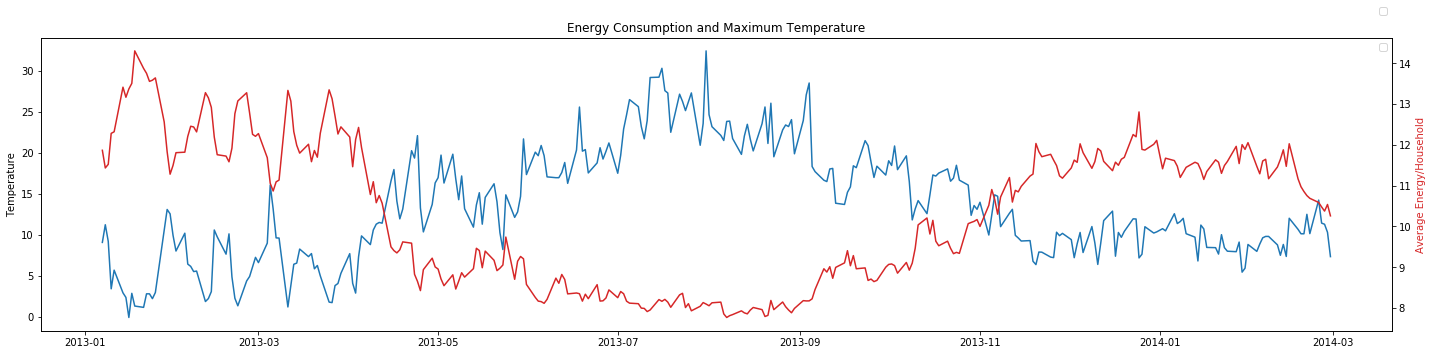

In [31]:
#Relationship of weather conditions with electricity consumption
fig,ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy_gbp.day, weather_energy_gbp.temperatureMax)
ax1.set_ylabel('Temperature')
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(weather_energy_gbp.day,weather_energy_gbp.avg_energy,color = 'tab:red')
ax2.set_ylabel('Average Energy/Household',color = 'tab:red')
ax2.legend(bbox_to_anchor=(0.0, 1.02, 1.0, 0.102))
plt.title('Energy Consumption and Maximum Temperature')
fig.tight_layout()
plt.show()

In [32]:
weather_energy_gbp.corr().loc['temperatureMax','avg_energy']

-0.909388518756229

No handles with labels found to put in legend.
No handles with labels found to put in legend.


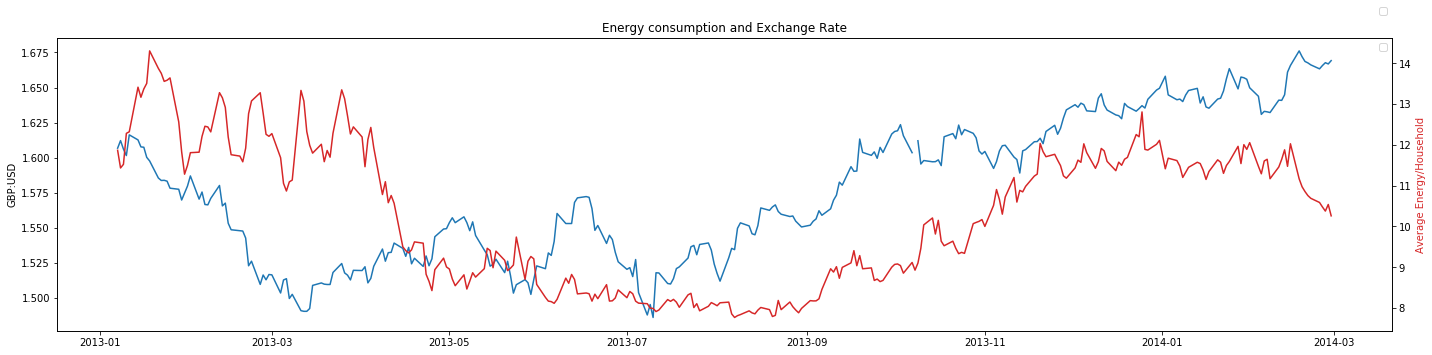

In [33]:
#Understanding trend between Strength of GBP VS average energy usage
fig,ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy_gbp.day, weather_energy_gbp.Close)
ax1.set_ylabel('GBP:USD')
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(weather_energy_gbp.day,weather_energy_gbp.avg_energy,color = 'tab:red')
ax2.set_ylabel('Average Energy/Household',color = 'tab:red')
ax2.legend(bbox_to_anchor=(0.0, 1.02, 1.0, 0.102))
plt.title('Energy consumption and Exchange Rate')
fig.tight_layout()
plt.show()

In [34]:
weather_energy_gbp.corr().loc['Close','avg_energy']

0.3424331249146084

No handles with labels found to put in legend.
No handles with labels found to put in legend.


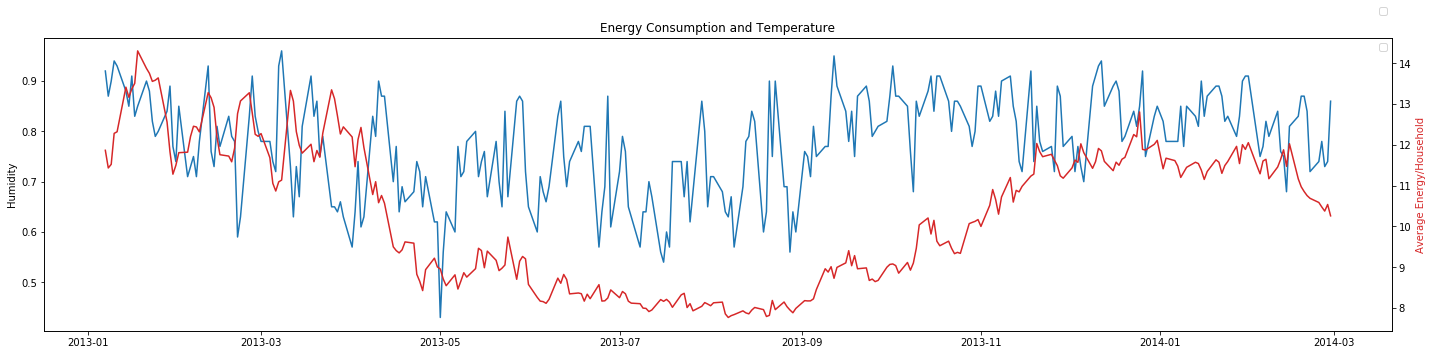

In [35]:
#Understanding trend between Humidity VS average energy usage

fig,ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy_gbp.day, weather_energy_gbp.humidity)
ax1.set_ylabel('Humidity')
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(weather_energy_gbp.day,weather_energy_gbp.avg_energy,color = 'tab:red')
ax2.set_ylabel('Average Energy/Household',color = 'tab:red')
ax2.legend(bbox_to_anchor=(0.0, 1.02, 1.0, 0.102))
plt.title('Energy Consumption and Temperature')
fig.tight_layout()
plt.show()

In [36]:
weather_energy_gbp.corr().loc['humidity','avg_energy']

0.34194393437579096

In [37]:
# Linear Regression
from sklearn.model_selection import train_test_split



In [38]:
weather_energy_gbp.isnull().values.any()

True

In [39]:
weather_energy_gbp['Close'].fillna((weather_energy_gbp['Close'].mean()),inplace=True)

In [40]:
weather_energy_gbp.isnull().values.any()

False

In [41]:
columns=list(weather_energy_gbp.columns)
dropcolumn = ['day','energy_sum','LCLid','avg_energy']
for i in dropcolumn:
    if i in columns:
        columns.remove(i)
x = weather_energy_gbp[columns]
y = weather_energy_gbp['avg_energy']


In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)


In [43]:
#Get p-values (use of statsmodel insteal of lm package for detailed statistical summary)
x_train=sm.add_constant(x_train)
lm = sm.OLS(y_train,x_train )
lm2 = lm.fit()
print(lm2.summary())


                            OLS Regression Results                            
Dep. Variable:             avg_energy   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     97.50
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           1.14e-85
Time:                        18:14:19   Log-Likelihood:                -167.90
No. Observations:                 209   AIC:                             373.8
Df Residuals:                     190   BIC:                             437.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

No handles with labels found to put in legend.
No handles with labels found to put in legend.


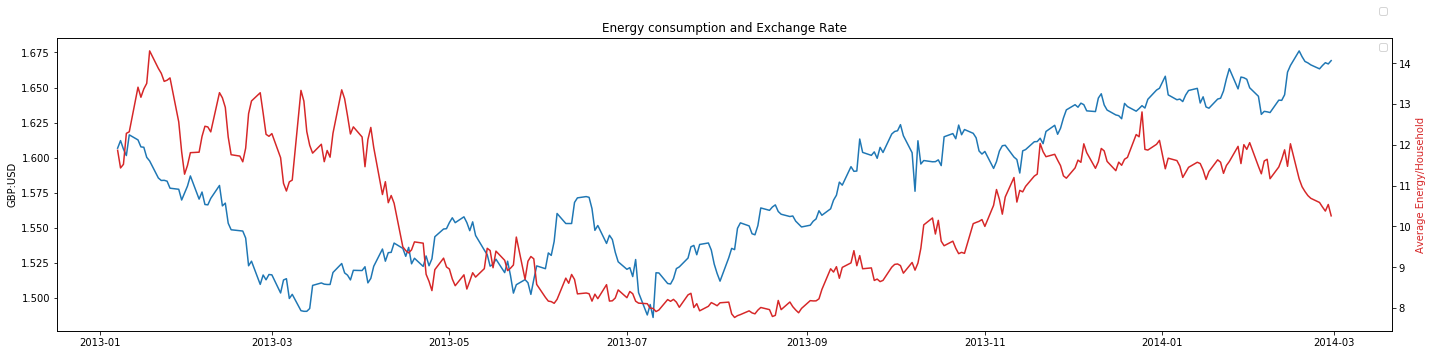

In [44]:
#Understanding trend between Strength of GBP VS average energy usage
fig,ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy_gbp.day, weather_energy_gbp.Close)
ax1.set_ylabel('GBP:USD')
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(weather_energy_gbp.day,weather_energy_gbp.avg_energy,color = 'tab:red')
ax2.set_ylabel('Average Energy/Household',color = 'tab:red')
ax2.legend(bbox_to_anchor=(0.0, 1.02, 1.0, 0.102))
plt.title('Energy consumption and Exchange Rate')
fig.tight_layout()
plt.show()


No handles with labels found to put in legend.
No handles with labels found to put in legend.


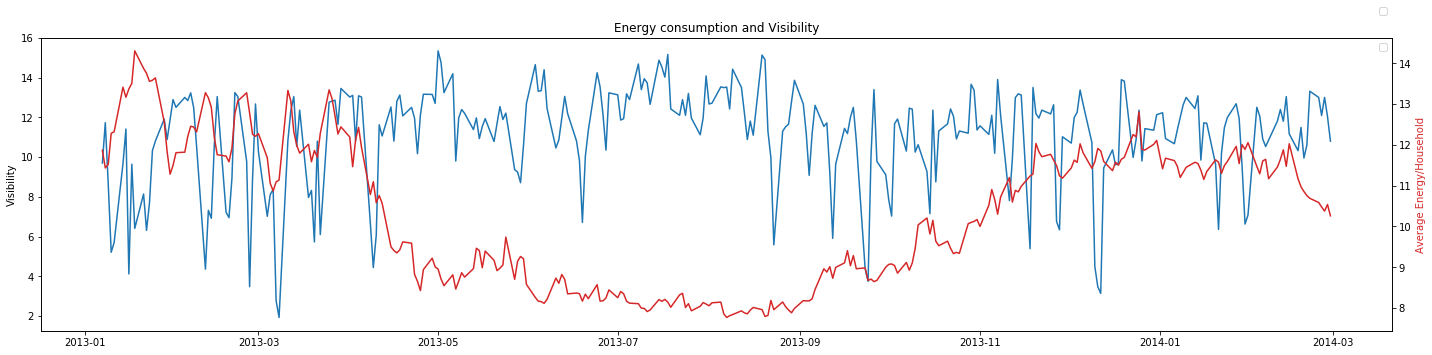

In [45]:
#Understanding trend between Strength of GBP VS average energy usage
fig,ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy_gbp.day, weather_energy_gbp.visibility)
ax1.set_ylabel('Visibility')
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(weather_energy_gbp.day,weather_energy_gbp.avg_energy,color = 'tab:red')
ax2.set_ylabel('Average Energy/Household',color = 'tab:red')
ax2.legend(bbox_to_anchor=(0.0, 1.02, 1.0, 0.102))
plt.title('Energy consumption and Visibility')
fig.tight_layout()
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


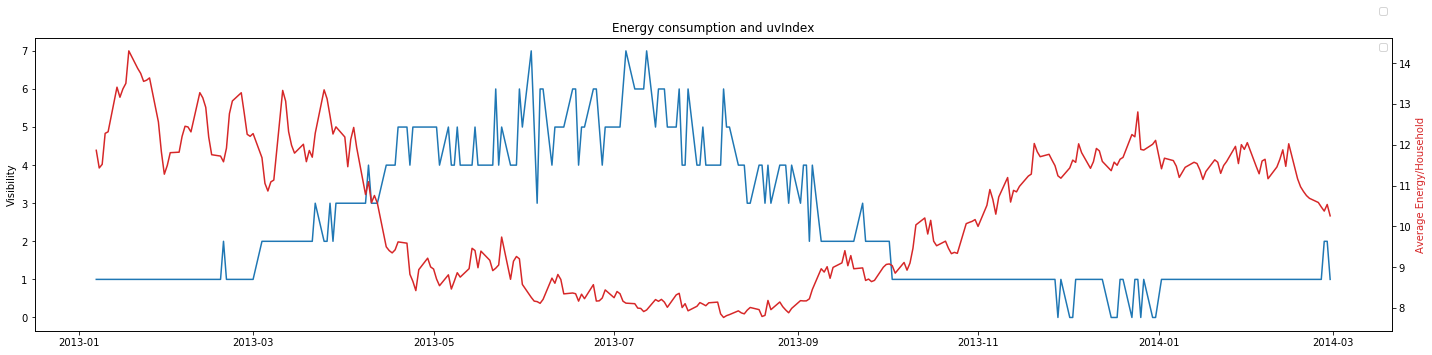

In [46]:
fig,ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy_gbp.day, weather_energy_gbp.uvIndex)
ax1.set_ylabel('Visibility')
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(weather_energy_gbp.day,weather_energy_gbp.avg_energy,color = 'tab:red')
ax2.set_ylabel('Average Energy/Household',color = 'tab:red')
ax2.legend(bbox_to_anchor=(0.0, 1.02, 1.0, 0.102))
plt.title('Energy consumption and uvIndex')
fig.tight_layout()
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


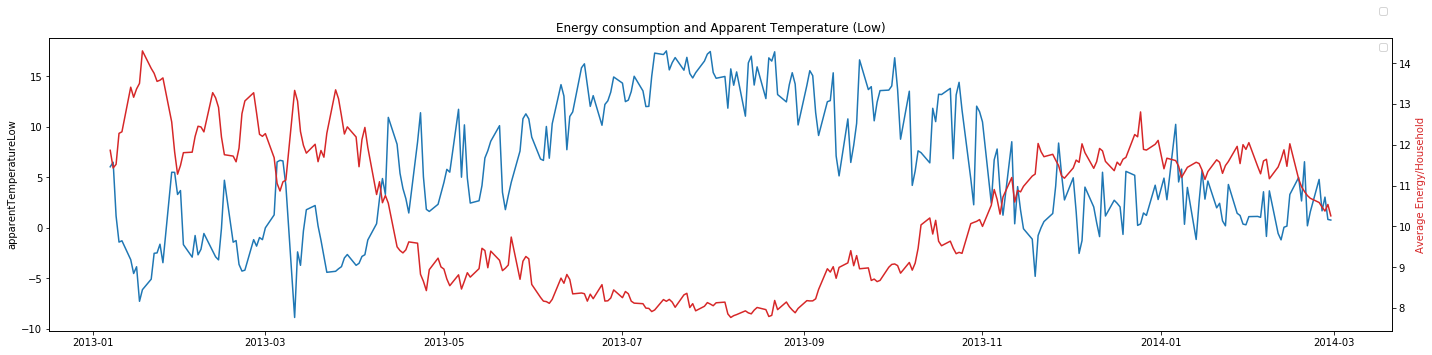

In [47]:
fig,ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy_gbp.day, weather_energy_gbp.apparentTemperatureLow)
ax1.set_ylabel('apparentTemperatureLow')
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(weather_energy_gbp.day,weather_energy_gbp.avg_energy,color = 'tab:red')
ax2.set_ylabel('Average Energy/Household',color = 'tab:red')
ax2.legend(bbox_to_anchor=(0.0, 1.02, 1.0, 0.102))
plt.title('Energy consumption and Apparent Temperature (Low)')
fig.tight_layout()
plt.show()

In [48]:
#Refine model using factors with P < 0.5, with only 1 temperature factor to reduce multicollinearity
x = weather_energy_gbp[['visibility','apparentTemperatureLow','uvIndex','Close']]
y = weather_energy_gbp['avg_energy']
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.3, random_state=101)



In [49]:
x_train2

,visibility,apparentTemperatureLow,uvIndex,Close
34,13.04,-4.20,1.0,1.526252
1,11.73,6.48,1.0,1.612201
133,13.73,15.01,6.0,1.518003
282,10.53,-0.86,1.0,1.632706
278,7.08,1.10,1.0,1.649838
...,...,...,...,...
40,7.02,1.27,2.0,1.503601
75,12.50,8.49,5.0,1.522534
87,11.97,10.18,4.0,1.547988
63,13.08,-2.67,3.0,1.514005


In [50]:
x_train2=sm.add_constant(x_train2)
lm_2 = sm.OLS(y_train2,x_train2 )
lm_3 = lm_2.fit()


In [51]:
print (lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:             avg_energy   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     316.2
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           3.15e-86
Time:                        18:14:20   Log-Likelihood:                -204.67
No. Observations:                 209   AIC:                             419.3
Df Residuals:                     204   BIC:                             436.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     16

Average Energy use = 20.7945 -0.0598(visibility ) -0.1606(apparentTemperatureLow) - -0.4113(uvIndex) -5.0074 (Close)

#PCA Principal Component Analysis
from sklearn.decomposition import PCA
weather_energy_gbp.shape


#Creating weather clusters using K means clustering
scaler = MinMaxScaler()
weather_scaled = scaler.fit_transform(weather_energy_gbp[['visibility','apparentTemperatureLow','uvIndex','Close']])

kmeans = KMeans(n_clusters=4, max_iter=600, algorithm = 'auto')
kmeans.fit(weather_scaled)
weather_energy_gbp['weather_cluster'] = kmeans.labels_

# optimum K
Nc = range(1, 15)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans

score = [kmeans[i].fit(weather_scaled).score(weather_scaled) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()
#Optimal k=3

plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.scatter(weather_energy_gbp.weather_cluster,weather_energy_gbp.visibility)
plt.title('Weather Cluster vs. visibility')
plt.subplot(1, 3, 2)
plt.scatter(weather_energy_gbp.weather_cluster,weather_energy_gbp.apparentTemperatureLow)
plt.title('Weather Cluster vs. apparentTemperatureLow')
plt.subplot(1, 3, 3)
plt.scatter(weather_energy_gbp.weather_cluster,weather_energy_gbp.uvIndex)
plt.title('Weather Cluster vs. uvIndex')
#visibility','apparentTemperatureLow','uvIndex','Close'
plt.show()

fig, ax1 = plt.subplots(figsize = (10,6))
ax1.scatter(weather_energy_gbp.temperatureMax, 
            weather_energy_gbp.humidity, 
            s = weather_energy_gbp.windSpeed*20,
            c = weather_energy_gbp.weather_cluster)
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Humidity')
plt.show()

In [52]:
weather.corr()

,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
temperatureMax,1.000000,0.066226,0.854893,-0.332584,-0.147009,0.122966,0.985890,0.246552,-0.399969,0.888008,0.989423,0.689206,0.874488,0.888572,0.997844,0.904286,0.000866
windBearing,0.066226,1.000000,0.087704,-0.083740,0.078558,-0.030625,0.073090,0.276157,0.001558,0.044036,0.074993,-0.074733,0.048834,0.065370,0.061725,0.052124,0.023196
dewPoint,0.854893,0.087704,1.000000,-0.003382,-0.090370,-0.026797,0.859903,0.021173,0.079938,0.893000,0.864330,0.464695,0.890032,0.937326,0.851468,0.939583,-0.010082
cloudCover,-0.332584,-0.083740,-0.003382,1.000000,0.165238,-0.101524,-0.311122,-0.316673,0.492810,-0.121216,-0.306005,-0.254932,-0.088226,-0.042756,-0.335188,-0.084468,-0.054542
windSpeed,-0.147009,0.078558,-0.090370,0.165238,1.000000,-0.333642,-0.180291,0.290737,-0.056839,-0.138893,-0.167655,-0.138763,-0.063420,-0.015369,-0.155407,-0.128914,-0.021989
pressure,0.122966,-0.030625,-0.026797,-0.101524,-0.333642,1.000000,0.142983,-0.038472,-0.240828,0.097692,0.130172,0.097789,0.059160,0.006636,0.133804,0.057228,0.044341
apparentTemperatureHigh,0.985890,0.073090,0.859903,-0.311122,-0.180291,0.142983,1.000000,0.215557,-0.361853,0.888172,0.994971,0.674402,0.866151,0.882092,0.989197,0.906414,0.004326
visibility,0.246552,0.276157,0.021173,-0.316673,0.290737,-0.038472,0.215557,1.000000,-0.579350,0.140181,0.214508,0.250619,0.154965,0.172932,0.245663,0.130531,0.029688
humidity,-0.399969,0.001558,0.079938,0.492810,-0.056839,-0.240828,-0.361853,-0.579350,1.000000,-0.161737,-0.356773,-0.539316,-0.151515,-0.182868,-0.404803,-0.175450,-0.009161
apparentTemperatureLow,0.888008,0.044036,0.893000,-0.121216,-0.138893,0.097692,0.888172,0.140181,-0.161737,1.000000,0.888829,0.588342,0.981858,0.886959,0.887194,0.906058,0.003173


In [53]:
#Holiday
holiday = pd.read_csv('uk_bank_holidays.csv')
holiday['Bank holidays'] = pd.to_datetime(holiday['Bank holidays'],format='%Y-%m-%d').dt.date
holiday.head(4)

,Bank holidays,Type
0,2012-12-26,Boxing Day
1,2012-12-25,Christmas Day
2,2012-08-27,Summer bank holiday
3,2012-05-06,Queen?s Diamond Jubilee (extra bank holiday)


In [54]:
weather_energy_gbp = weather_energy_gbp.merge(holiday, left_on = 'day',right_on = 'Bank holidays',how = 'left')
weather_energy_gbp['holiday_ind'] = np.where(weather_energy_gbp['Bank holidays'].isna(),0,1)

#Arimax
weather_energy['Year'] = pd.DatetimeIndex(weather_energy['day']).year  
weather_energy['Month'] = pd.DatetimeIndex(weather_energy['day']).month
weather_energy.set_index(['day'],inplace=True)

model_data = weather_energy_gbp[['avg_energy','weather_cluster','holiday_ind']]
# train = model_data.iloc[0:round(len(model_data)*0.90)]
# test = model_data.iloc[len(train)-1:]
train = model_data.iloc[0:(len(model_data)-30)]
test = model_data.iloc[len(train):(len(model_data)-1)]

train['avg_energy'].plot(figsize=(25,4))
test['avg_energy'].plot(figsize=(25,4))

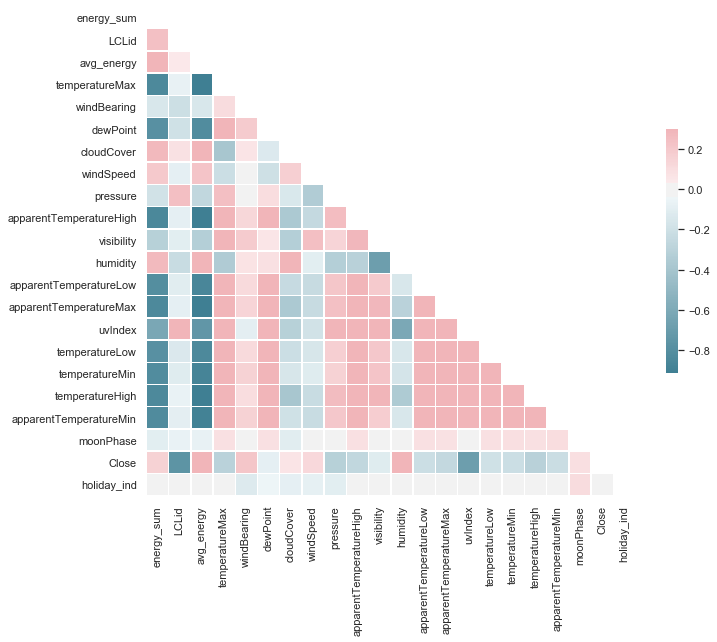

In [55]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")


# Compute the correlation matrix
corr = weather_energy_gbp.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [56]:
#LSTM
np.random.seed(11)
dataframe = weather_energy_gbp.loc[:,'avg_energy']
dataset = dataframe.values
dataset = dataset.astype('float32')

In [57]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [58]:
reframed = series_to_supervised(dataset, 7,1)
reframed.head(3)

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
7,11.863998,11.431619,11.520570,12.278979,12.317585,13.409793,13.163214,13.367240
8,11.431619,11.520570,12.278979,12.317585,13.409793,13.163214,13.367240,13.503246
9,11.520570,12.278979,12.317585,13.409793,13.163214,13.367240,13.503246,14.298728


reframed['weather_cluster'] = weather_energy_gbp.weather_cluster.values[7:]
reframed['holiday_ind']= weather_energy_gbp.holiday_ind.values[7:]

In [59]:
reframed['Close'] = weather_energy_gbp.Close.values[7:]
reframed['apparentTemperatureLow'] = weather_energy_gbp.apparentTemperatureLow.values[7:]
reframed['uvIndex'] = weather_energy_gbp.uvIndex.values[7:]
reframed['visibility'] = weather_energy_gbp.visibility.values[7:]
reframed['holiday_ind']= weather_energy_gbp.holiday_ind.values[7:]
#visibility','apparentTemperatureLow','uvIndex','Close'

In [60]:
reframed = reframed.reindex(['Close', 'apparentTemperatureLow','uvIndex','visibility','holiday_ind','var1(t-7)', 'var1(t-6)', 'var1(t-5)', 'var1(t-4)', 'var1(t-3)','var1(t-2)', 'var1(t-1)', 'var1(t)'], axis=1)
reframed = reframed.values

In [61]:
scaler = MinMaxScaler(feature_range=(0, 1))
reframed = scaler.fit_transform(reframed)

In [62]:
# split into train and test sets
train = reframed[:(len(reframed)-30), :]
test = reframed[(len(reframed)-30):len(reframed), :]

In [63]:
train

array([[0.63851401, 0.19029568, 0.14285714, ..., 0.86384183, 0.82607331,
        0.857324  ],
       [0.60060109, 0.06065201, 0.14285714, ..., 0.82607331, 0.857324  ,
        0.87815609],
       [0.58714235, 0.10424564, 0.14285714, ..., 0.857324  , 0.87815609,
        1.        ],
       ...,
       [0.82775228, 0.55041698, 0.14285714, ..., 0.58221604, 0.57737981,
        0.55295474],
       [0.78968145, 0.44389689, 0.14285714, ..., 0.57737981, 0.55295474,
        0.51784038],
       [0.78503379, 0.51175133, 0.14285714, ..., 0.55295474, 0.51784038,
        0.54745226]])

In [64]:
train[:, :-1] #Taking all but last value as train

array([[0.63851401, 0.19029568, 0.14285714, ..., 0.69654837, 0.86384183,
        0.82607331],
       [0.60060109, 0.06065201, 0.14285714, ..., 0.86384183, 0.82607331,
        0.857324  ],
       [0.58714235, 0.10424564, 0.14285714, ..., 0.82607331, 0.857324  ,
        0.87815609],
       ...,
       [0.82775228, 0.55041698, 0.14285714, ..., 0.56322653, 0.58221604,
        0.57737981],
       [0.78968145, 0.44389689, 0.14285714, ..., 0.58221604, 0.57737981,
        0.55295474],
       [0.78503379, 0.51175133, 0.14285714, ..., 0.57737981, 0.55295474,
        0.51784038]])

In [65]:
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [66]:
test_X[5]

array([0.85742257, 0.39082638, 0.14285714, 0.80164057, 0.        ,
       0.51784038, 0.54745226, 0.5913359 , 0.58231274, 0.54064462,
       0.56991206, 0.58499116])

In [67]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(262, 1, 12) (262,) (30, 1, 12) (30,)


In [68]:
test_X[5]

array([[0.85742257, 0.39082638, 0.14285714, 0.80164057, 0.        ,
        0.51784038, 0.54745226, 0.5913359 , 0.58231274, 0.54064462,
        0.56991206, 0.58499116]])

In [69]:
test_X[5]

array([[0.85742257, 0.39082638, 0.14285714, 0.80164057, 0.        ,
        0.51784038, 0.54745226, 0.5913359 , 0.58231274, 0.54064462,
        0.56991206, 0.58499116]])

In [70]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, verbose=2, shuffle=False)


Epoch 1/50
 - 0s - loss: 0.2985
Epoch 2/50
 - 0s - loss: 0.2578
Epoch 3/50
 - 0s - loss: 0.2252
Epoch 4/50
 - 0s - loss: 0.1977
Epoch 5/50
 - 0s - loss: 0.1761
Epoch 6/50
 - 0s - loss: 0.1585
Epoch 7/50
 - 0s - loss: 0.1418
Epoch 8/50
 - 0s - loss: 0.1267
Epoch 9/50
 - 0s - loss: 0.1156
Epoch 10/50
 - 0s - loss: 0.1087
Epoch 11/50
 - 0s - loss: 0.1021
Epoch 12/50
 - 0s - loss: 0.0929
Epoch 13/50
 - 0s - loss: 0.0827
Epoch 14/50
 - 0s - loss: 0.0748
Epoch 15/50
 - 0s - loss: 0.0689
Epoch 16/50
 - 0s - loss: 0.0649
Epoch 17/50
 - 0s - loss: 0.0620
Epoch 18/50
 - 0s - loss: 0.0605
Epoch 19/50
 - 0s - loss: 0.0598
Epoch 20/50
 - 0s - loss: 0.0594
Epoch 21/50
 - 0s - loss: 0.0591
Epoch 22/50
 - 0s - loss: 0.0587
Epoch 23/50
 - 0s - loss: 0.0582
Epoch 24/50
 - 0s - loss: 0.0577
Epoch 25/50
 - 0s - loss: 0.0573
Epoch 26/50
 - 0s - loss: 0.0570
Epoch 27/50
 - 0s - loss: 0.0568
Epoch 28/50
 - 0s - loss: 0.0566
Epoch 29/50
 - 0s - loss: 0.0563
Epoch 30/50
 - 0s - loss: 0.0560
Epoch 31/50
 - 0s -

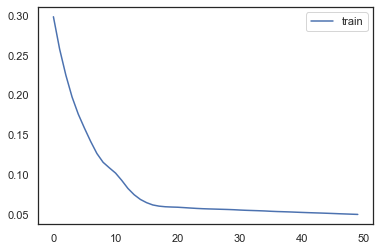

In [71]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()
pyplot.show()

In [72]:
test_X[1]

array([[0.82249932, 0.42835481, 0.14285714, 0.33035048, 0.        ,
        0.56322653, 0.58221604, 0.57737981, 0.55295474, 0.51784038,
        0.54745226, 0.5913359 ]])

In [73]:
yhat = model.predict(test_X)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[2])


In [74]:
yhat[1]

array([0.55767196], dtype=float32)

In [75]:
test_X[1]

array([0.82249932, 0.42835481, 0.14285714, 0.33035048, 0.        ,
       0.56322653, 0.58221604, 0.57737981, 0.55295474, 0.51784038,
       0.54745226, 0.5913359 ])

In [76]:
test_y[1]

0.5823127428256534

In [77]:
# invert scaling for forecast
inv_yhat = np.concatenate((test_X,yhat ), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_X,test_y), axis=1)


In [78]:
inv_y[1] #First value is added in

array([0.82249932, 0.42835481, 0.14285714, 0.33035048, 0.        ,
       0.56322653, 0.58221604, 0.57737981, 0.55295474, 0.51784038,
       0.54745226, 0.5913359 , 0.58231274])

In [79]:
inv_y = scaler.inverse_transform(inv_y)
inv_y[1]

array([ 1.642414  ,  2.42      ,  1.        ,  6.36      ,  0.        ,
       11.4471674 , 11.5711441 , 11.53956985, 11.38010597, 11.15085506,
       11.34418201, 11.63068485, 11.57177544])

In [80]:
act = [i[12] for i in inv_y] # Last element is the predicted average energy
pred = [i[12] for i in inv_yhat] # Last element is the actual average energy
from sklearn.metrics import mean_squared_error
# calculate RMSE
import math
rmse = math.sqrt(mean_squared_error(act, pred))
percent = rmse*100/weather_energy_gbp['avg_energy'].mean() 
print('Test RMSE: %.3f' % rmse)
print('RMSE Percent error: %.3f' % percent)

Test RMSE: 0.405
RMSE Percent error: 3.936


In [81]:
inv_yhat[1]

array([ 1.642414  ,  2.42      ,  1.        ,  6.36      ,  0.        ,
       11.4471674 , 11.5711441 , 11.53956985, 11.38010597, 11.15085506,
       11.34418201, 11.63068485, 11.41090332])

In [82]:
inv_y[1]

array([ 1.642414  ,  2.42      ,  1.        ,  6.36      ,  0.        ,
       11.4471674 , 11.5711441 , 11.53956985, 11.38010597, 11.15085506,
       11.34418201, 11.63068485, 11.57177544])

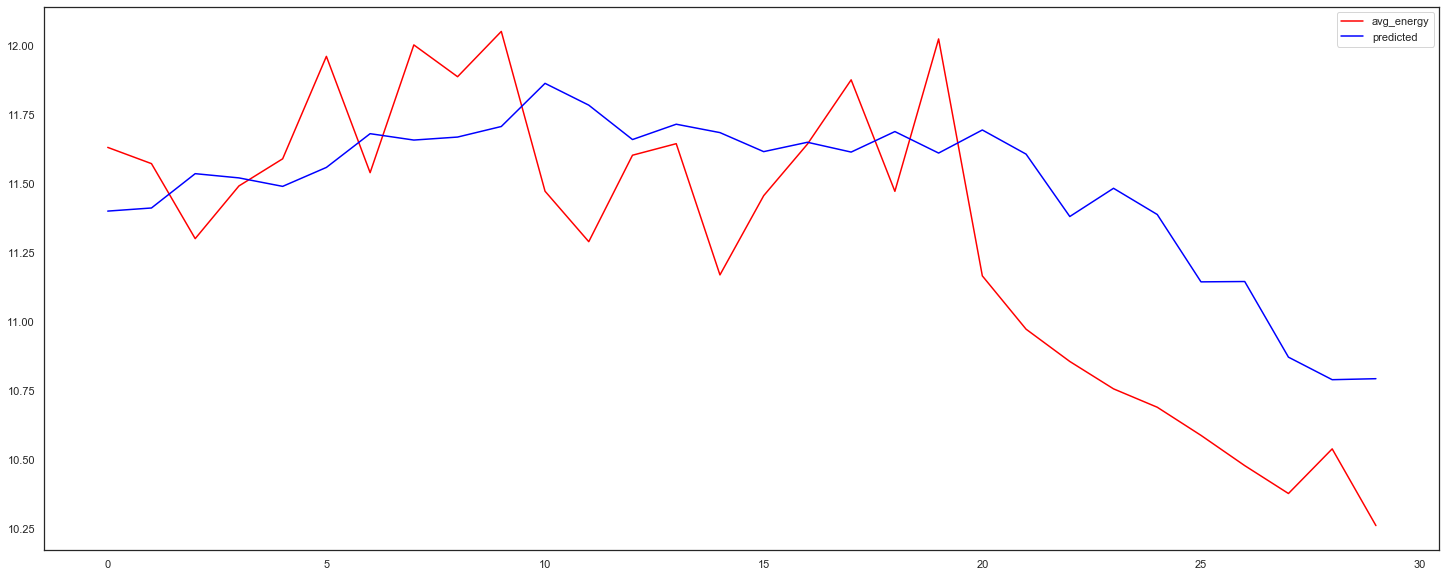

In [83]:
predicted_lstm = pd.DataFrame({'predicted':pred,'avg_energy':act})
predicted_lstm['avg_energy'].plot(figsize=(25,10),color = 'red')
predicted_lstm['predicted'].plot(color = 'blue')
pyplot.legend()
plt.show()

In [84]:
predicted_lstm 

,predicted,avg_energy
0,11.399614,11.630685
1,11.410903,11.571775
2,11.535375,11.299737
3,11.520051,11.490815
4,11.489320,11.589262
5,11.558035,11.960808
6,11.680389,11.539022
7,11.657265,12.002336
8,11.668142,11.886982
9,11.706486,12.051321


In [85]:
pred[-1] #Get latest predicted value

10.791780548462341

In [86]:
#Arima


energy=energy[["day","energy_sum"]]

energy.describe()




,energy_sum
count,829.000000
mean,43535.325676
std,20550.594031
min,90.385000
25%,34665.436003
50%,46641.160997
75%,59755.616996
max,84156.135002


In [87]:
energy['day'] = pd.to_datetime(energy['day'], format='%Y-%m-%d')
df = energy

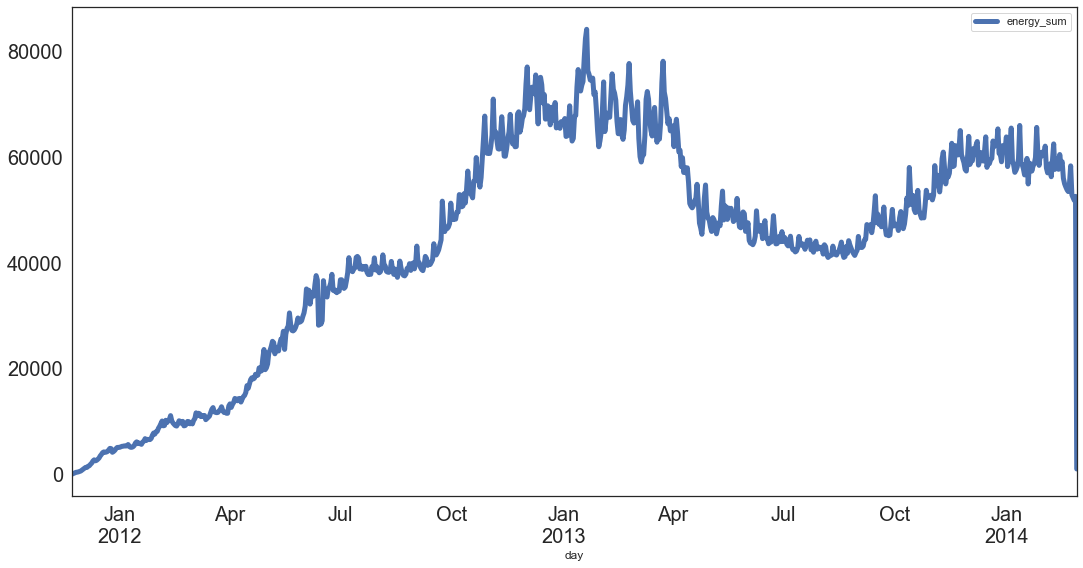

In [88]:
df.plot.line(x = 'day', y = 'energy_sum',  figsize=(18,9), linewidth=5, fontsize=20)
plt.show()

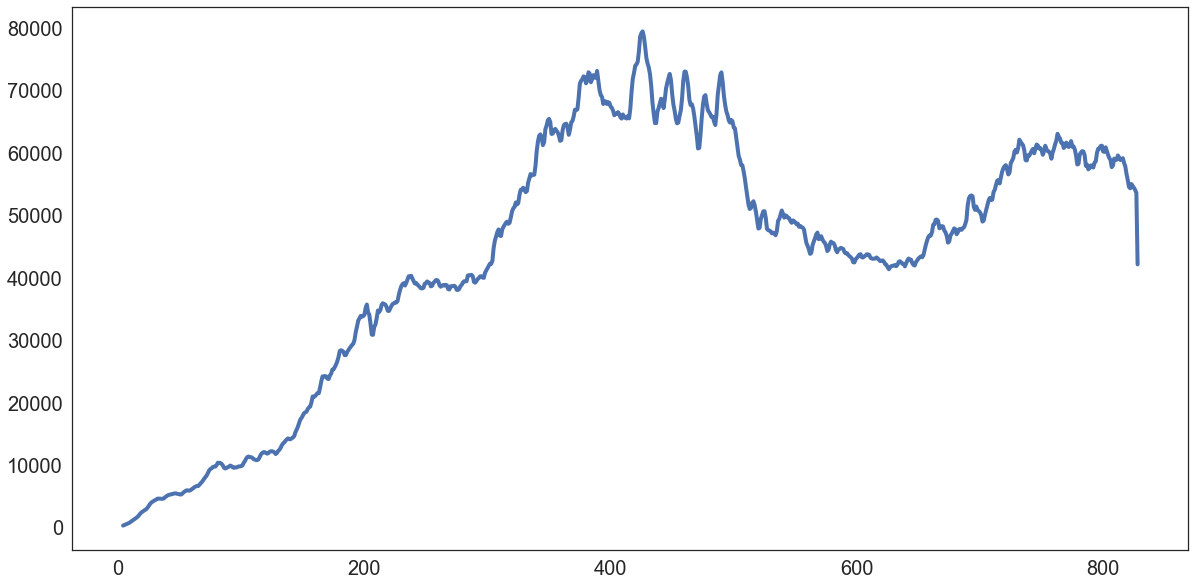

In [89]:
# for trend analysis
df['energy_sum'].rolling(5).mean().plot(figsize=(20,10), linewidth=4, fontsize=20)
plt.show()

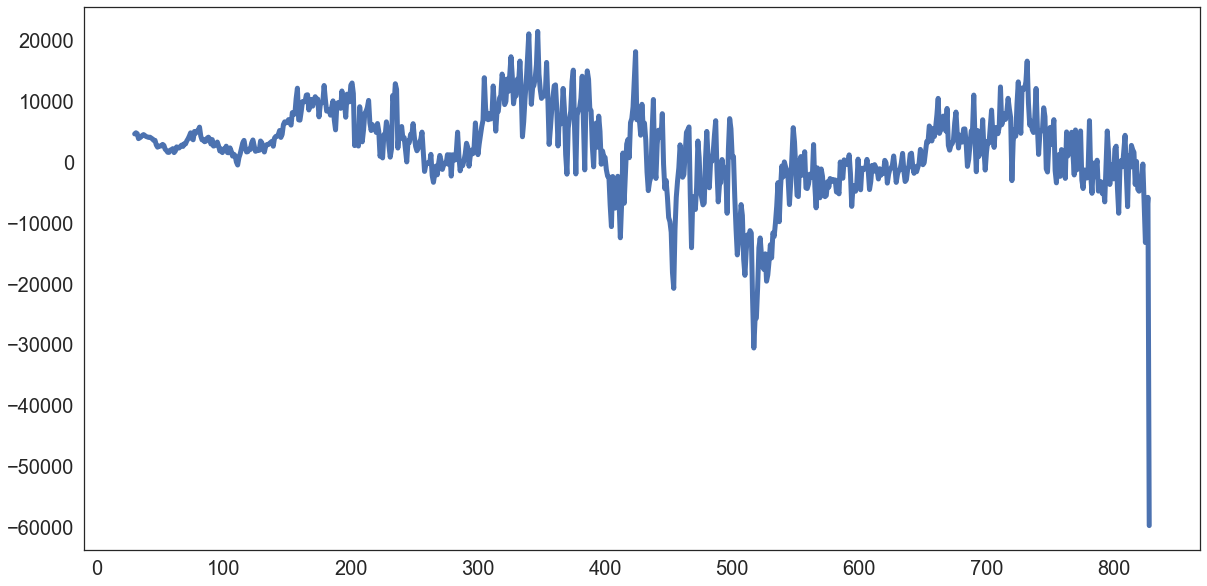

In [90]:
# For seasonal variations
df['energy_sum'].diff(periods=30).plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.show()

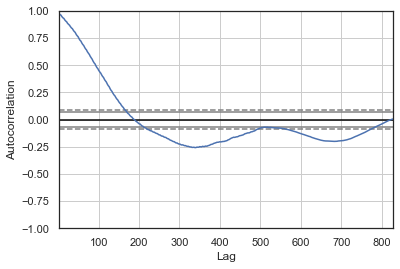

In [91]:
pd.plotting.autocorrelation_plot(df['energy_sum'])
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


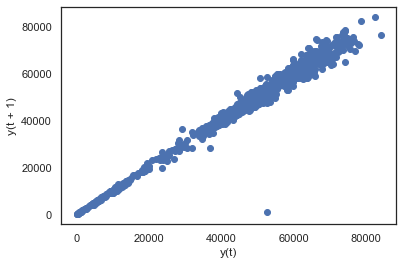

In [92]:
pd.plotting.lag_plot(df['energy_sum'])
plt.show()

In [93]:
df = df.set_index('day')
df.head()


,energy_sum
day,
2011-11-23,90.385000
2011-11-24,213.412000
2011-11-25,303.993000
2011-11-26,420.976000
2011-11-27,444.883001


In [94]:
# Applying Seasonal ARIMA model to forcast the data 
mod = sm.tsa.SARIMAX(df['energy_sum'], trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print(results.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                                      SARIMAX Results                                       
Dep. Variable:                           energy_sum   No. Observations:                  829
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood               -7656.283
Date:                              Wed, 12 Aug 2020   AIC                          15318.567
Time:                                      18:14:25   BIC                          15332.680
Sample:                                  11-23-2011   HQIC                         15323.984
                                       - 02-28-2014                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1176      0.054     -2.170      0.030      -0.224      -0.011
ma.S.L12      -0.99

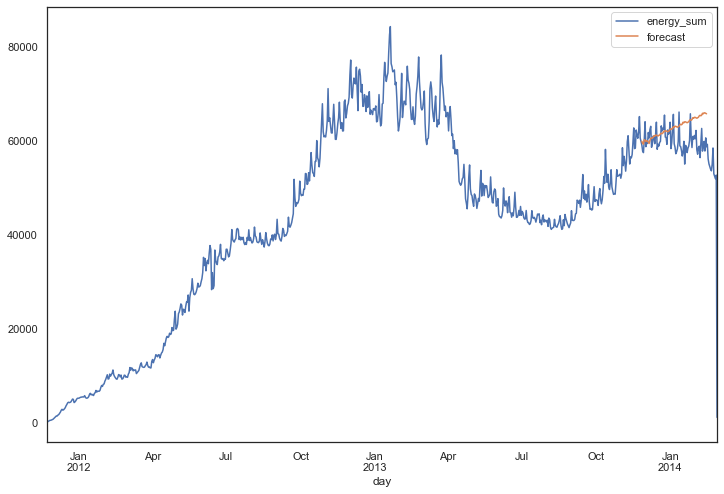

In [95]:
df['forecast'] = results.predict(start = 735, end= 815, dynamic= True)  
df[['energy_sum', 'forecast']].plot(figsize=(12, 8))
plt.show()

In [96]:
def forcasting_future_days(df, no_of_days):
    df_perdict = df.reset_index()
    mon = df_perdict['day']
    mon = mon + pd.DateOffset(days = no_of_days)
    future_dates = mon[-no_of_days -1:]
    df_perdict = df_perdict.set_index('day')
    future = pd.DataFrame(index=future_dates, columns= df_perdict.columns)
    df_perdict = pd.concat([df_perdict, future])
    df_perdict['forecast'] = results.predict(start = 810, end = 810 + no_of_days, dynamic= True)  
    df_perdict[['energy_sum', 'forecast']].iloc[-no_of_days - 12:].plot(figsize=(12, 8))
    plt.show()
    return df_perdict[-no_of_days:]

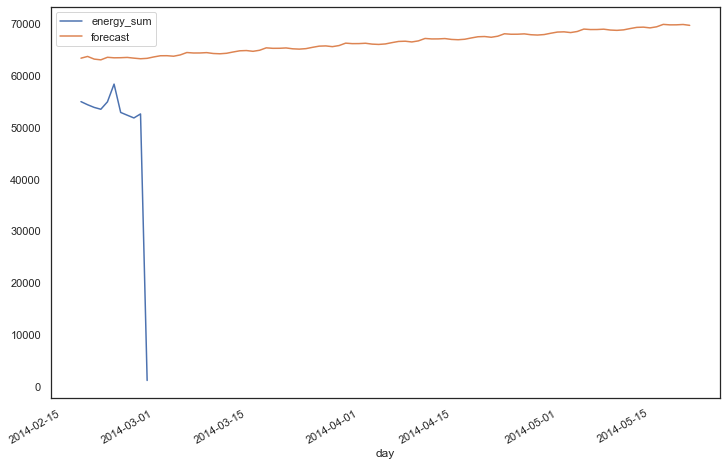

In [97]:
predicted = forcasting_future_days(df,100)


In [98]:
predicted

,energy_sum,forecast
day,,
2014-03-01,NaN,63597.523176
2014-03-02,NaN,63825.645600
2014-03-03,NaN,63836.465993
2014-03-04,NaN,63737.450296
2014-03-05,NaN,63986.526372
...,...,...
2014-06-04,NaN,NaN
2014-06-05,NaN,NaN
2014-06-06,NaN,NaN
